In [8]:
#Step 1
#importing the libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Data.csv")
display(data)
display( data.describe() )
dataset = data.iloc[ : , 2: ]


,Timestamp,Full Name,Age,Gender,Admission Category,Course Applied For ( in FULL ),O Level Result Used,POST UTME SCREENING RESULT,Admitted
0,9/15/2023 20:14,Olatoye Olaide Gabriel,23,Male,Four Years,Computer Science,NECO,60.0,Yes
1,9/16/2023 13:58,Adewumi Oluwapelumi Emmanuel,20,Male,Two Years,Computer Science,WAEC,70.6,Yes
2,9/16/2023 14:24,Adebayo Victoria Feranmi,20,Female,Four Years,Computer science,WAEC,60.0,Yes
3,9/16/2023 14:24,Adekunle abiola,21,Female,Four Years,Computer science,WAEC,68.0,Yes
4,9/16/2023 14:34,Abdulrasaq waheed alabi,23,Male,Four Years,Computer science,NECO,70.5,Yes
...,...,...,...,...,...,...,...,...,...
94,12/26/2023 12:56,OYEBIMPE DANIELLA,18,FEMALE,Four Years,Agricultural Extension,WAEC,79.0,Yes
95,12/26/2023 12:56,FADARE ANEEF,23,MALE,Four Years,Agricultural Extension,WAEC,46.0,No
96,12/26/2023 12:56,OLUWASEUN IFEMADE,18,FEMALE,Four Years,Agricultural Extension,WAEC,56.0,Yes
97,12/26/2023 12:56,OJUAWO IREMIDE,18,MALE,Four Years,Agricultural Extension,WAEC,39.0,No


,Age,POST UTME SCREENING RESULT
count,99.000000,89.000000
mean,20.272727,57.933258
std,2.014327,12.545015
min,17.000000,23.000000
25%,19.000000,50.000000
50%,20.000000,56.600000
75%,22.000000,68.500000
max,23.000000,90.200000


In [9]:
# Step 2 
# Data preprocessing
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan , strategy="mean")
dataset.iloc[ : , -2] = imputer.fit_transform(dataset.iloc[ : , -2].values.reshape(-1,1))
display(dataset)



,Age,Gender,Admission Category,Course Applied For ( in FULL ),O Level Result Used,POST UTME SCREENING RESULT,Admitted
0,23,Male,Four Years,Computer Science,NECO,60.0,Yes
1,20,Male,Two Years,Computer Science,WAEC,70.6,Yes
2,20,Female,Four Years,Computer science,WAEC,60.0,Yes
3,21,Female,Four Years,Computer science,WAEC,68.0,Yes
4,23,Male,Four Years,Computer science,NECO,70.5,Yes
...,...,...,...,...,...,...,...
94,18,FEMALE,Four Years,Agricultural Extension,WAEC,79.0,Yes
95,23,MALE,Four Years,Agricultural Extension,WAEC,46.0,No
96,18,FEMALE,Four Years,Agricultural Extension,WAEC,56.0,Yes
97,18,MALE,Four Years,Agricultural Extension,WAEC,39.0,No


In [10]:
#Step 3 encoding categorical data
from sklearn.preprocessing import LabelEncoder 
#Encoding gender column
dataset.iloc[ : , 1] = [ gender.lower() for gender in dataset.iloc[: , 1] ]
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct_gen = ColumnTransformer([("Gender" , OneHotEncoder() , [1])] , remainder='passthrough')
ct_gen.fit(dataset)
dataset = ct_gen.transform(dataset)


#Encoding Admission category
dataset[ : , 3] = [ ac.lower() for ac in dataset[ : , 3] ]
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct_ac = ColumnTransformer([("Admission Category" , OneHotEncoder() , [3])] , remainder='passthrough')
ct_ac.fit(dataset)
dataset = ct_ac.transform(dataset)

In [11]:
#Step 4
#Feature extraction 
X = dataset[ : , [0,1,2,3,4,5,6,9]]
y = dataset[ : , -1]
y = [ n.lower() for n in y ]
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
display(X , y)

array([[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 23, 60.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 20, 70.6],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 20, 60.0],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 21, 68.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 23, 70.5],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 22, 50.9],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 22, 50.0],
       [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 17, 60.0],
       [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 20, 78.9],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 21, 60.9],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 19, 57.9332584269663],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 17, 57.9332584269663],
       [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 23, 57.9332584269663],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 23, 57.9332584269663],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 22, 50.0],
       [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 20, 60.0],
       [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 20, 60.5],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 19, 78.5],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 22, 57.9332584269663],
       [0

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [12]:
#Step 5
# feature scaling 
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x.fit(X)
X = sc_x.transform(X)


In [13]:
#Step 6
# splitting the dataset into training set and testing set
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X , y, test_size=0.2 )


In [14]:
#Step 7
#Building Logistic Regressor
from sklearn.linear_model import LogisticRegression
lgRegressor = LogisticRegression()
lgRegressor.fit(X_train , y_train)


LogisticRegression()

In [17]:
#Step 8, testing the model with test dataset
y_pred = lgRegressor.predict(X_test)

display("Predicted Values" , y_pred)
display("Actual Values" , y_test)

'Predicted Values'

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

'Actual Values'

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1])

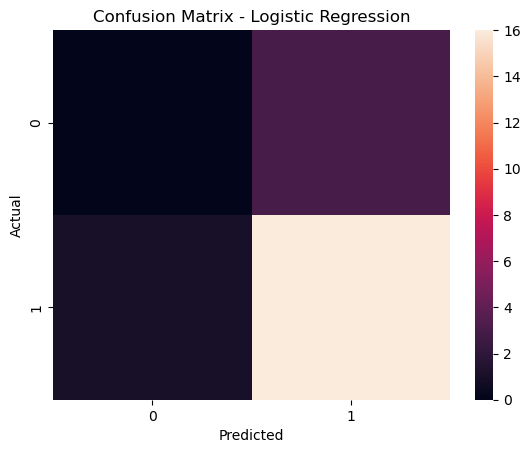

In [11]:
# Accuracy / Metric comparison 
from sklearn.metrics import confusion_matrix , accuracy_score
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
lgscore  = accuracy_score(y_test, y_pred)
# Plot confusion matrix
confusion_matrix_ = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_, fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [12]:
#Step 9
# Building Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train , y_train)

DecisionTreeClassifier(random_state=0)

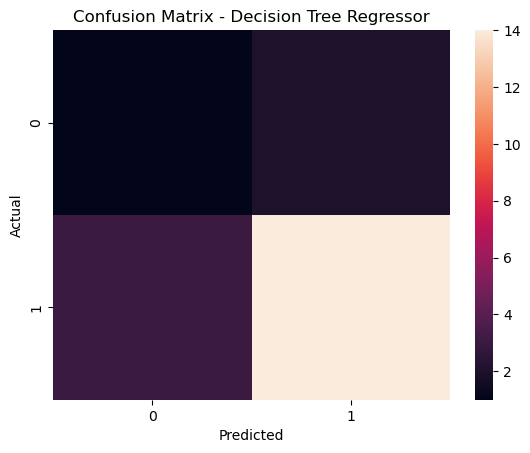

In [13]:
#Step 10, testing the model with test dataset
y_pred2 = classifier.predict(X_test)
dtscore = accuracy_score(y_test, y_pred)
# Plot confusion matrix
confusion_matrix_ = pd.crosstab(y_test, y_pred2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_, fmt='d')
plt.title('Confusion Matrix - Decision Tree Regressor')
plt.show()

In [14]:
#Step 11
#Building Linear Regression 
from sklearn.linear_model import LinearRegression
lnRegressor = LinearRegression()
X_regression = dataset[ : , 6]  # age
y_regression = dataset[ : , 9] # POST UTME outcome

In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_regression , y_regression, test_size=0.25)
lnRegressor.fit(X_train.reshape(-1, 1) , y_train.reshape(-1, 1) )
#Step 12, testing the model with test dataset
y_pred = lnRegressor.predict(X_train.reshape(-1, 1))
lnscore = lnRegressor.coef_[0][0]
print(lnscore) # Linear regressor accuracy using coefficient of correlation

0.0934803031925992


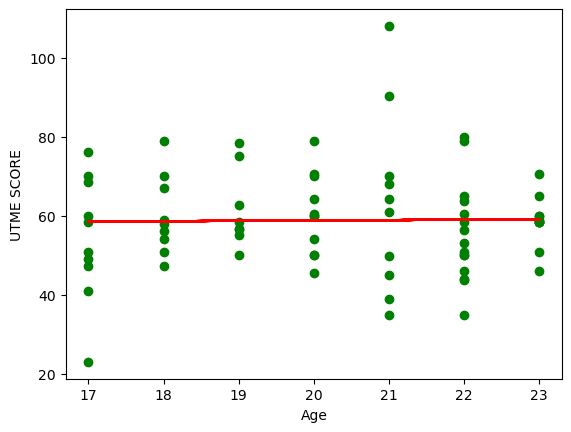

In [19]:
# Plotting Linear regression graph
plt.xlabel("Age")
plt.ylabel("UTME SCORE")
plt.scatter(X_train.reshape(-1, 1) , y_train.reshape(-1, 1) , color='green' )
plt.plot(X_train.reshape(-1, 1) , y_pred, color='red')
plt.show()

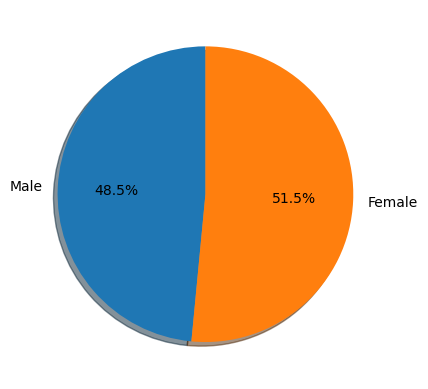

In [20]:
#Step 13
# plotting pie chart for gender 
genders = data.iloc[: , 3 ].values
males = []
females = []
for g in genders:
    if g.lower() == "male":
        males.append(g.lower())
    else:
        females.append(g.lower())
gender_label = ['Male' , 'Female' ]
gender_count = [males.count("male") , females.count('female')]
fig, ax = plt.subplots()
plt.pie(gender_count , labels=gender_label , autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

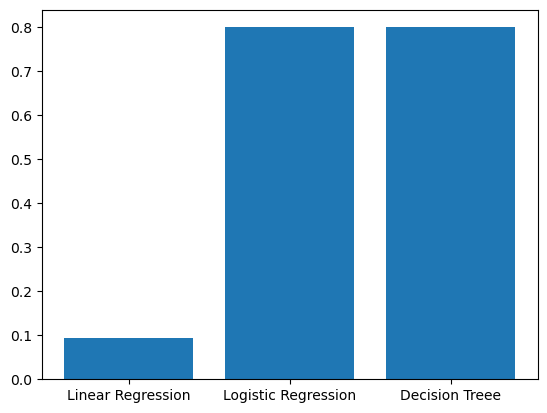

In [21]:
#Step 14 accuracy comparison
model_names = ["Linear Regression" , "Logistic Regression" , "Decision Treee"]
model_scores =[lnscore , lgscore, dtscore]
plt.bar(model_names, model_scores)
plt.show()